In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from tqdm import tqdm

In [33]:
ds = xr.open_mfdataset("../era5/era5-nordics-t2m_ymon.nc", chunks={"time": 12})

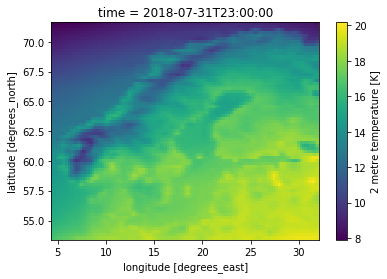

In [34]:
ds["t2m"][6].plot()

In [35]:
ds["temp_c"] = ds["t2m"] - 273.15

In [28]:
ds_std = xr.open_mfdataset("../era5/era5-nordics-t2m_ymonstd.nc", chunks={"time": 12})

In [29]:
ds_std

<xarray.Dataset>
Dimensions:    (latitude: 73, longitude: 111, time: 12)
Coordinates:
  * time       (time) datetime64[ns] 2018-01-31T23:00:00 2018-02-28T23:00:00 ...
  * longitude  (longitude) float32 4.5 4.75 5.0 5.25 5.5 5.75 6.0 6.25 6.5 ...
  * latitude   (latitude) float32 71.5 71.25 71.0 70.75 70.5 70.25 70.0 ...
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<shape=(12, 73, 111), chunksize=(12, 73, 111)>
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Wed Nov 21 07:38:12 2018: cdo -b 32 ymonstd -addc,-273.15 -...
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

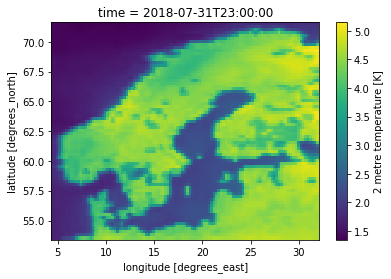

In [32]:
ds_std["t2m"][6].plot()

In [31]:
psr = xr.open_dataset("pine_spruce_ratio.nc")

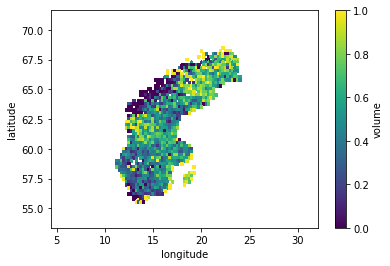

In [9]:
psr.volume.plot()

In [36]:
df = pd.DataFrame()

In [41]:
data = {
    "ratio": psr.to_array().values.ravel(),
}

In [42]:
for m in range(0, 12):
    data["std%02d" % (m + 1)] = ds_std["t2m"][m].values.ravel()
    data["mean%02d" % (m + 1)] = ds["temp_c"][m].values.ravel()

In [43]:
data.keys()

dict_keys(['ratio', 'std01', 'mean01', 'std02', 'mean02', 'std03', 'mean03', 'std04', 'mean04', 'std05', 'mean05', 'std06', 'mean06', 'std07', 'mean07', 'std08', 'mean08', 'std09', 'mean09', 'std10', 'mean10', 'std11', 'mean11', 'std12', 'mean12'])

In [44]:
df = pd.DataFrame(data)

In [45]:
df.dropna(inplace=True)

In [57]:
df = df[df["ratio"] > 0]

In [58]:
df.columns[1:]

Index(['std01', 'mean01', 'std02', 'mean02', 'std03', 'mean03', 'std04',
       'mean04', 'std05', 'mean05', 'std06', 'mean06', 'std07', 'mean07',
       'std08', 'mean08', 'std09', 'mean09', 'std10', 'mean10', 'std11',
       'mean11', 'std12', 'mean12'],
      dtype='object')

In [59]:
rf = RandomForestRegressor(n_estimators=500, max_depth=10)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df[df.columns[1:]], df["ratio"])

In [61]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [62]:
y_pred = rf.predict(X_test)

In [63]:
mean_squared_error(y_test, y_pred)

0.04741174863650256

In [64]:
r2_score(y_test, y_pred)

0.2353535713032625

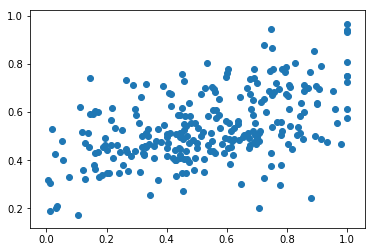

In [65]:
plt.scatter(y_test, y_pred)

In [66]:
df_results = pd.DataFrame({"observed": y_test, "predicted": y_pred},)

In [67]:
df_results

,observed,predicted
3614,0.812021,0.543484
2727,0.744370,0.771762
6028,0.254261,0.379373
5802,0.268174,0.434624
3826,0.213399,0.461646
2631,0.473491,0.638552
4151,0.460940,0.582972
3918,0.229678,0.532843
3715,0.466183,0.406473
6265,0.901498,0.632478


In [68]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',                                                                 ascending=False)

In [69]:
feature_importances

,importance
std02,0.104693
std10,0.096821
mean08,0.077971
mean07,0.059389
std05,0.057478
std01,0.047826
std06,0.045572
mean04,0.038315
std12,0.037982
mean09,0.036471


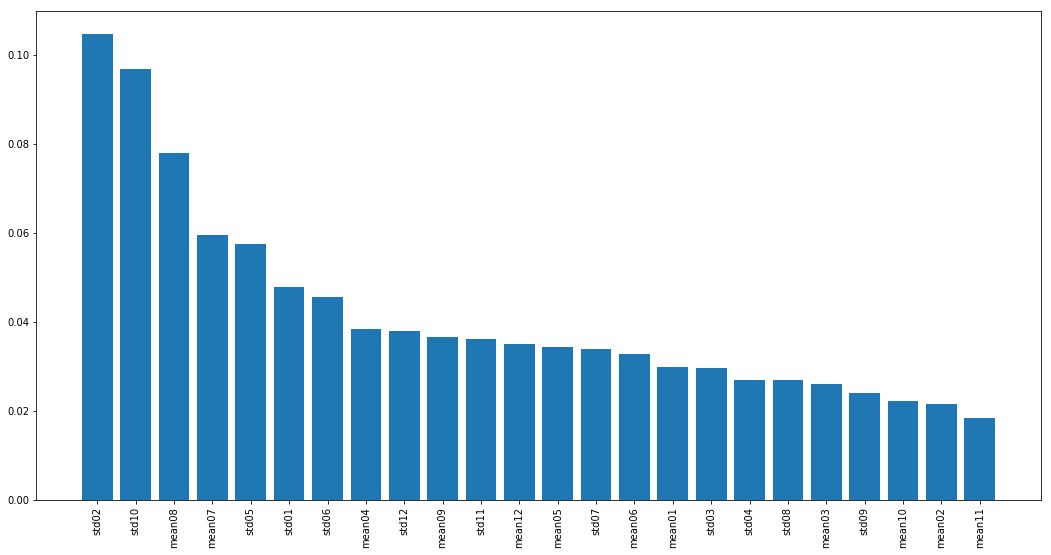

In [74]:
plt.figure(figsize=(18,9))
plt.bar(feature_importances.index, feature_importances["importance"])
plt.xticks(rotation=90)
plt.show()